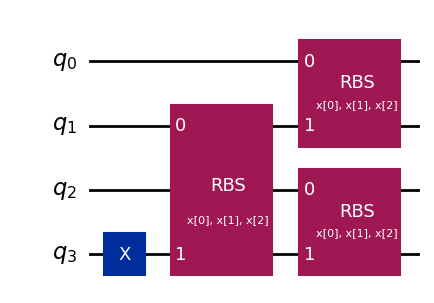

In [1]:
# import the necessary classes for encoding and ansatz construction from the ionqvision library
from ionqvision.ansatze.ansatz_library import UnaryEncoder
# create an encoder with 4 qubits to convert classical data into a quantum state
encoder = UnaryEncoder(num_qubits=4)
# visualize the encoder architecture using matplotlib
encoder.draw("mpl")

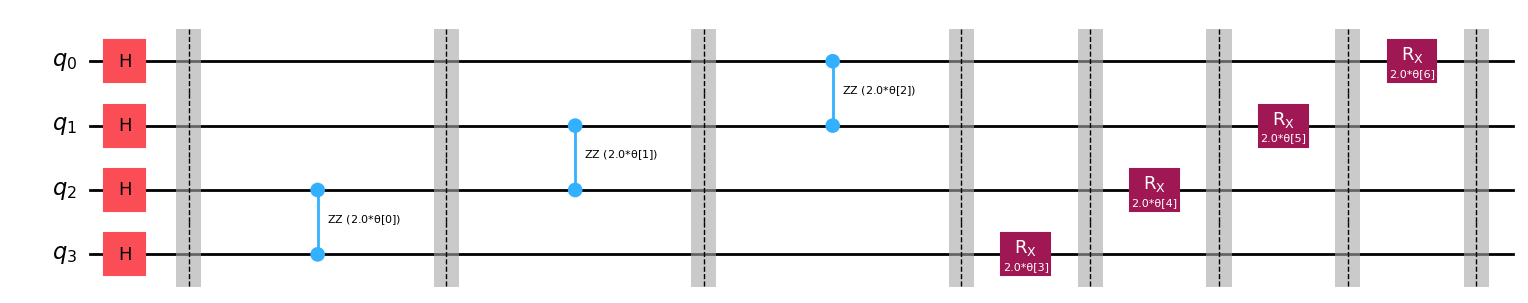

In [2]:
from ionqvision.ansatze.ansatz_library import QAOAAnsatz
# import SparsePauliOp to represent the Hamiltonian as a sum of Pauli operators
from qiskit.quantum_info import SparsePauliOp

# define the Hamiltonian for the quantum system using two-qubit Pauli-Z interactions
# this includes ZZ interactions between neighboring qubits
hamiltonian = SparsePauliOp.from_list([("ZZII", 1), ("IZZI", 1), ("IIZZ", 1)])

# initialize the QAOA ansatz with the defined Hamiltonian and a depth of 1
ansatz = QAOAAnsatz(hamiltonian, depth=1)
# visualize the circuit of the ansatz
ansatz.draw("mpl")

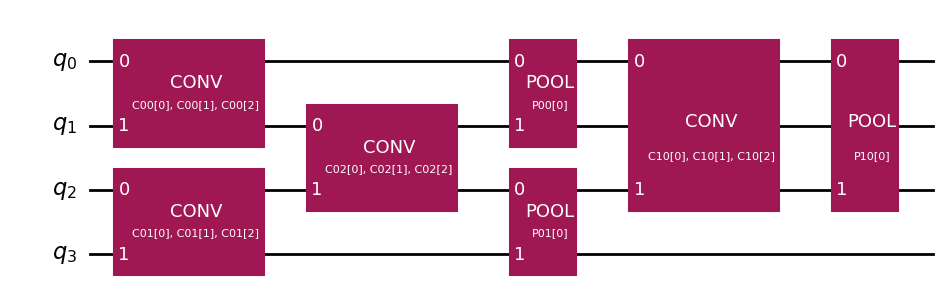

In [3]:
from ionqvision.ansatze.ansatz_library import QCNNAnsatz

ansatz = QCNNAnsatz(num_qubits=4)
ansatz.draw("mpl")

In [4]:
from ionqvision.modules import BinaryMNISTClassifier
# Set up your classifier and inspect its architecture
from qiskit.quantum_info import SparsePauliOp

# defining a list of quantum features to measure the expectation values of specific Pauli operators
quantum_features = [
    SparsePauliOp(["IIIX"]),  # Pauli X operator applied to the 0th qubit, identity on the others
    SparsePauliOp(["IIIY"]),  # Pauli Y operator applied to the 0th qubit, identity on the others
    SparsePauliOp(["IIIZ"])   # Pauli Z operator applied to the 0th qubit, identity on the others
]

classifier = BinaryMNISTClassifier(encoder, ansatz, quantum_features); classifier


INFO:qiskit.passmanager.base_tasks:Pass: ContainsInstruction - 0.01097 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.00858 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: HighLevelSynthesis - 0.04625 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: BasisTranslator - 0.09322 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ElidePermutations - 0.00739 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: RemoveDiagonalGatesBeforeMeasure - 0.06795 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.04649 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutationAnalysis - 0.28443 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutativeCancellation - 0.17738 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Collect2qBlocks - 0.08106 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ConsolidateBlocks - 0.12374 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Split2QUnitaries - 0.03648 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.00668 (ms)
INFO:qiskit.passm

BinaryMNISTClassifier(
  (latent_vec_encoder): Sequential(
    (0): Linear(in_features=168, out_features=4, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): Sigmoid()
  )
  (quantum_layer): QuantumModule()
  (prediction_head): Sequential(
    (0): Linear(in_features=3, out_features=1, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): Sigmoid()
  )
)

In [5]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

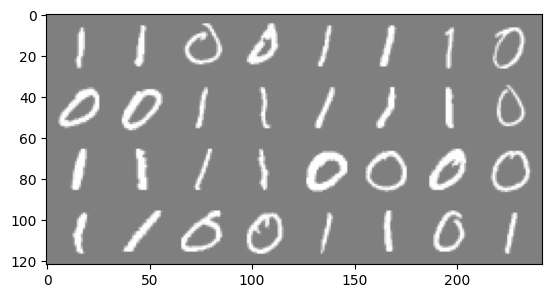

In [6]:
# Check out your quantum layer
classifier.quantum_layer.layer_qc.draw("mpl")
# Verify the images loaded correctly
classifier.visualize_batch()


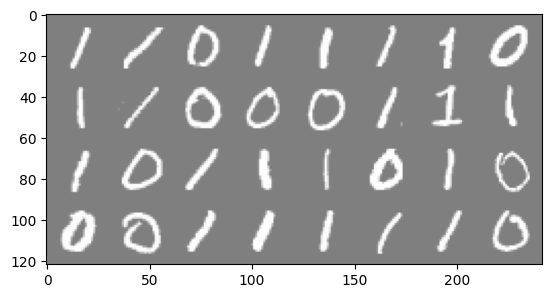

In [7]:
classifier.quantum_layer.layer_qc.draw("mpl")

# Verify the images loaded correctly
classifier.visualize_batch()

In [12]:
%%time
# get the training and test set; pre-process the data as needed
# specify the size for training and testing datasets
train_set, test_set = classifier.get_train_test_set(train_size=300, test_size=100)

# define a configuration for training the classifier
# 'config' should be a dictionary that specifies training parameters
# define a configuration for training the classifier with the expected parameters for QAOAAnsatz
qaoa_config = {
    'hamiltonian': hamiltonian,       # the Hamiltonian defined earlier for the quantum system
    'multi_angle': True,              # whether to use multiple angles in the ansatz
    'depth': 1,                       # the depth of the ansatz circuit
    'initial_state': None,            # optional initial state
    'rot': "X"                        # the rotation type for the ansatz
}

# initialize the QAOA ansatz with the parameters from the qaoa_config dictionary
ansatz = QAOAAnsatz(
    hamiltonian=qaoa_config['hamiltonian'],
    multi_angle=qaoa_config['multi_angle'],
    depth=qaoa_config['depth'],
    initial_state=qaoa_config['initial_state'],
    rot=qaoa_config['rot']
)

# define a configuration for training the classifier
train_config = {
    'lr': 0.01,           # set the learning rate for the optimizer
    'epochs': 100,                   # specify the number of epochs for training
    'batch_size': 32,                # set the batch size for training
    'log_interval': 1,               # frequency of logging during training
}

# train the classifier using the defined training and test sets
classifier.train_module(train_set, test_set, train_config)
# plot the training progress to visualize the performance over epochs
classifier.plot_training_progress()

AssertionError: Mismatching number of input parameters given